In [4]:
import numpy as np
import gym

**Expected value.**

$$
  Q_{k}(a) = \frac{R_{1} + R_{2} + R_{3} + ... + R_{k}}{k_{a}}
$$

That is, the expected reward at play *k* for action *a* is the arithmetic mean of all the pre- vious rewards we’ve received for taking action *a*.

In [7]:
def exp_reward(action, history):
    rewards_for_action = history[action]
    return sum(rewards_for_action) / len(rewards_for_action)

A simple way to figure out the the slot machine with the average payout is to select the action associated with the highest Q value.

$$
    a_{i} - A_{k}
$$

$$
    a^* = argmax_{a}Q_{k}(a_{i})
$$

In [8]:
def get_best_action(actions, history):
    exp_rewards = [exp_reward(action, history) for action in actions]
    return argmax(exp_rewards)

Solution.

Loops through all possible actions.
Gets the value of the current action.

This method is called **greedy** (or exploitation) method.

In [9]:
def get_best_action(actions):
    best_action = 0
    max_action_value = 0
    for i in range(len(actions)):
        cur_action_value = get_action_value(actions[i])
        if cur_action_value > max_action_value:
            best_action = i
            max_action_value = cur_action_value
    return best_action

**Solving 10-armed bandit problem.**

In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt

In [2]:
n = 10
probs = np.random.rand(n)
eps = 0.2

In [3]:
def get_reward(prob, n=10):
    reward = 0
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward

In [34]:
np.mean([get_reward(0.7) for _ in range(2000)])

7.006

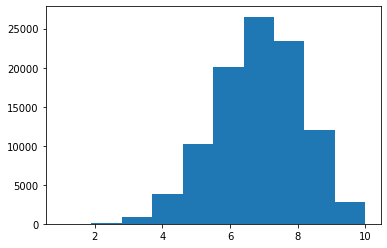

In [45]:
# the hist of probability
plt.hist([get_reward(0.7) for _ in range(100000)])
plt.show()

In [49]:
# array that contains the records of each machine.
# forst columns -- the number of times pulled.
# second columns -- the avrage pulled value(reward).
records = np.zeros((n, 2))
records

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

*We can update records with this formula.*

$$
  u_{new} = \frac{k * u_{old} + x}{k+1}
$$

In [50]:
def update_record(record,action,r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

In [52]:
# get the arm with the largest avrage reward.
def get_best_arm(record):
    arm_index = np.argmax(record[:,1],axis=0)
    return arm_index

*After many trails we see that we found the arm that had the max probability to give us the best reword.
We keep track of the mean reward.*

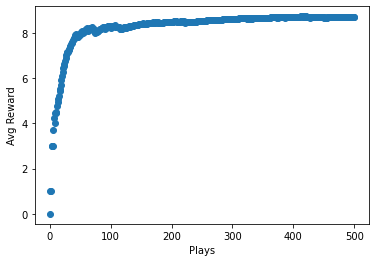

In [84]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
record = np.zeros((n,2))
probs = np.random.rand(n)
eps = 0.2
rewards = [0]

for i in range(500):
    if random.random() > eps:
        choice = get_best_arm(record)
    else:
        choice = np.random.randint(10)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
    
ax.scatter(np.arange(len(rewards)),rewards)

In [60]:
record

array([[ 16.        ,   6.4375    ],
       [ 18.        ,   7.05555556],
       [  7.        ,   1.71428571],
       [ 13.        ,   6.15384615],
       [ 16.        ,   4.625     ],
       [  8.        ,   1.        ],
       [ 10.        ,   8.2       ],
       [400.        ,   9.5425    ],
       [  5.        ,   0.6       ],
       [  7.        ,   9.28571429]])

This sort of problems are called **stationary** problems because the underlying reward probability distributions for the arms does not change over time.

------------------------------------------------------------------------------------

Softmax selection policy. To put some policies on exploration. It doesn't randomly choose whatever action(arm) to take, but it gives some probabilities to see the first, second and third best fit to do exploration.

In [69]:
def softmax(av, tau=1.12):
    softm = np.exp(av / tau) / np.sum( np.exp(av / tau) )
    return softm

If we were to implement the multi-arm bandit using softmax selection policy, we would not have get_best_arm, we would compute the softmax vector of the rewards column in records and then select of of the arms with the highest probaility.

In [63]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
av = np.zeros(10)
p = softmax(av)
p

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [81]:
np.random.choice(x,p=p)

4

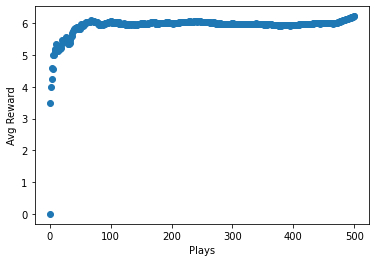

In [86]:
# with softmax

n = 10
probs = np.random.rand(n)
record = np.zeros((n,2))

fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
# fig.set_size_inches(9,5)
rewards = [0]

for i in range(500):
    p = softmax(record[:,1])
    choice = np.random.choice(np.arange(n),p=p)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
    
ax.scatter(np.arange(len(rewards)),rewards)